# Hyperparameter Tuning
## Patrick Robotham - April 2019, Eliiza

# Hyperparameters

Hyperparameters consist of all the configuration stuff you have to pass in to initialize a machine learing algorithm. Let's count how many hyperparameters there are for the "SGDRegressor" algorithm that this [handy flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) recommends.

In [6]:
import sklearn.svm
sklearn.svm.SVC?


Init signature:
sklearn.svm.SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to dataset with more than a couple of 10000 samples.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, optional (default=1.0)
    Penalty parameter C of th

There are 20 arguments to this function, and many of them have _unhelpful_ names like `gamma`, or `C`. Presented with this soup of greek letters, it's easy to become confused or overwhelmed.

- The `rbf` hyperparameter specifies what kernel to use. It's a discrete set of options.
- The `C` hyperparameter helps determine the extent of regularization. It's a float, and thus continuous.


# Bias/Variance
One useful idea in machine learning is the concept of the Bias/Variance tradeoff

Below is a table summarising this tradeoff. I tend to prefer starting with models likely to be biased.

| High Bias Models | High Variance Models|
|------------------|-----------------------|
| Less Parameters  | More Parameters |
| Tends to be simpler | Tends to more complex|
| Underfits | Overfits
| Faster | Slower
| Training Error $\approx$ Validation Error| Training Error $\ll$ Validation Error
| Use with less data | Use with more data|
| Smaller Model Size | Larger Model Size
| Easier to Interpret | Harder to Interpret


We can reduce variance at the cost of bias by adding regularization.
We can increase variance by switching to a more complex model, or adding parameters, or reducing regularization.


# Cross Validation

One way to measure the tradeoff between bias and variance - underfitting and getting less accuracy, vs overfitting and failing to generalise, is to have two different sets. The training set, and the validation set.  The model is trained on the training set, and we check its ability to generalise on the validation set. We judge the model's performance based on its error on the validation set. 

9


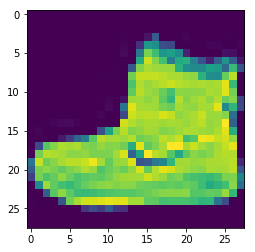

In [4]:
from sklearn import datasets, preprocessing
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(y_train[0])
plt.imshow(x_train[0])

9


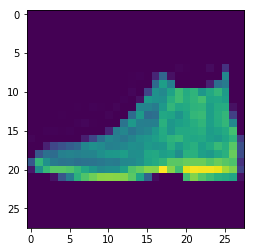

In [5]:
print(y_test[0])
plt.imshow(x_test[0])

# A Mathematical View

The key task of (supervised) machine learning is function approximation. If $x$ is our input, and $y$ is our target output, we want to find $f$ such that $|f(x) - y|$ is minimized.

In other words, we want to compute.
$$\arg \min_{f} |f(x) - y|$$

This is typically done by _parameterizing_ f, with a vector of parameters $\theta = ( \theta_1 , \theta_2,  \ldots, \theta_n)$. We first select a _family_ of functions (e.g. linear regression, decision tres) by referencing the sklearn flowchart.

So that we compute

$$ \arg \min_{\theta} |f(x, \theta) - y|$$

We do this by _training a model_.

Since our models have hyperparamters, we have additional "non-learnable parameters" $H = (H_1, H_2, \ldots, H_k)$. So the equation becomes.

$$\arg \min_{\theta} |f(x, \theta, H) - y| $$


Here almost everything is determined except this nasty H. $x$ and $y$ come from our data, $\theta$ is taken care of by the machine learning algorithm. What we want to move to is...

$$\arg \min_{\theta, H} |f(x, \theta, H) - y| $$

That is, we want an algorithm for finding the best hyperparameters.

# Hyperparameter Tuning recap

- Parameters of a model are _learnable_ from data + model algorithm
- Hyperparameters specify the kind of model to use, not learnable by using the model algorithm.
- Structure of problem: Find parameters $\theta , H$ such that   `validation_loss`$(f(X,\theta, H))$ is minimized. 
- This is a machine learning problem! We use training error to find $\theta$ and validation error to find $H$.
- To get an accurate assessment and to avoid "peeking", we use a third set, the "test set" to measure final model performance.
- Obstacles: discrete vs continuous, structure of search space unknown


# Algorithms - Grid Search

- “Try everything”!
- For discrete variables, try all possible values. For continuous values, we need to 'bucketize'
- Decide advance on search space of hyperparameters, try every possible combination and see which ones do best on the dev set.
- Advantages: Simple, Obviously Correct
- Disadvantages: Speed. Exponential computational complexity. Need to binning.


In [3]:
import sklearn.model_selection

sklearn.model_selection.GridSearchCV?

Init signature:
sklearn.model_selection.GridSearchCV(
    estimator,
    param_grid,
    scoring=None,
    fit_params=None,
    n_jobs=None,
    iid='warn',
    refit=True,
    cv='warn',
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score='raise-deprecating',
    return_train_score='warn',
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or 

In [20]:
%%capture --no-display # Suppress annoying warnings
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 3, 4 ,5]} # Search for 'C' and 'kernel' hyperparameters.
svc = svm.SVC(gamma="scale") # Use support vector machine classifier
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.000805,0.000230,0.000357,0.000081,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.966667,1.0,1.000000,...,0.986667,0.016330,1,0.975000,0.983333,0.991667,1.000000,0.966667,0.983333,0.011785
7,0.000973,0.000217,0.000692,0.000271,4,rbf,"{'C': 4, 'kernel': 'rbf'}",0.966667,1.0,1.000000,...,0.986667,0.016330,1,0.975000,0.983333,0.991667,1.000000,0.966667,0.983333,0.011785
0,0.000708,0.000089,0.000425,0.000063,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
1,0.001115,0.000392,0.000692,0.000241,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.975000,0.983333,0.983333,0.950000,0.973333,0.012247
2,0.000708,0.000099,0.000443,0.000098,2,linear,"{'C': 2, 'kernel': 'linear'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
8,0.002490,0.002520,0.004390,0.004014,5,linear,"{'C': 5, 'kernel': 'linear'}",1.000000,1.0,0.933333,...,0.980000,0.026667,3,0.975000,0.966667,0.991667,0.991667,0.966667,0.978333,0.011304
9,0.001268,0.000356,0.000736,0.000336,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.991667,0.991667,0.991667,0.975000,0.985000,0.008165
3,0.000796,0.000173,0.000381,0.000106,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.966667,1.0,0.966667,...,0.973333,0.024944,8,0.983333,0.991667,0.991667,0.991667,0.975000,0.986667,0.006667
4,0.000741,0.000048,0.000389,0.000040,3,linear,"{'C': 3, 'kernel': 'linear'}",0.966667,1.0,0.933333,...,0.973333,0.024944,8,0.975000,0.975000,0.991667,0.991667,0.966667,0.980000,0.010000
6,0.001239,0.000279,0.000699,0.000402,4,linear,"{'C': 4, 'kernel': 'linear'}",0.966667,1.0,0.933333,...,0.973333,0.024944,8,0.975000,0.966667,0.991667,0.991667,0.975000,0.980000,0.010000


# Algorithms - Random Search
- Try things randomly
- Advantages: Faster. Handles Continuous Hyperparameters.
- Disadvantages: Not all search space is covered
- Digression: No Free Lunch Theorem


In [2]:
# Todo: Give an example of this working
sklearn.model_selection.RandomizedSearchCV?

Init signature:
sklearn.model_selection.RandomizedSearchCV(
    estimator,
    param_distributions,
    n_iter=10,
    scoring=None,
    fit_params=None,
    n_jobs=None,
    iid='warn',
    refit=True,
    cv='warn',
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=None,
    error_score='raise-deprecating',
    return_train_score='warn',
)
Docstring:     
Randomized search on hyper parameters.

RandomizedSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but
rather a fixed number of parameter settings is sampled from the specified
distributions. The number of parameter settings that are tried is
given by n_iter.

If all parameters ar

In [22]:
%%capture --no-display
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# specify parameters and distributions to sample from
param_dist = {"kernel": ['linear', 'rbf', 'poly'],
              "C": sp_randint(1, 20)}
svc = svm.SVC(gamma="scale") # Use support vector machine classifier
# run randomized search
n_iter_search = 20
clf = RandomizedSearchCV(svc, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
clf.fit(iris.data, iris.target)
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,0.002930,0.001979,0.001493,0.001874,4,rbf,"{'C': 4, 'kernel': 'rbf'}",0.966667,1.0,1.000000,...,0.986667,0.016330,1,0.975000,0.983333,0.991667,1.000000,0.966667,0.983333,0.011785
9,0.002798,0.003861,0.002024,0.002364,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.966667,1.0,1.000000,...,0.986667,0.016330,1,0.975000,0.983333,0.991667,1.000000,0.966667,0.983333,0.011785
6,0.000815,0.000285,0.000453,0.000149,15,rbf,"{'C': 15, 'kernel': 'rbf'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.975000,0.991667,0.983333,0.966667,0.978333,0.008498
17,0.000502,0.000114,0.000247,0.000030,2,linear,"{'C': 2, 'kernel': 'linear'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
11,0.000686,0.000289,0.000441,0.000320,5,linear,"{'C': 5, 'kernel': 'linear'}",1.000000,1.0,0.933333,...,0.980000,0.026667,3,0.975000,0.966667,0.991667,0.991667,0.966667,0.978333,0.011304
7,0.000871,0.000143,0.000700,0.000311,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.991667,0.991667,0.991667,0.975000,0.985000,0.008165
0,0.000799,0.000124,0.000337,0.000056,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.991667,0.991667,0.991667,0.975000,0.985000,0.008165
5,0.000661,0.000090,0.000492,0.000269,12,rbf,"{'C': 12, 'kernel': 'rbf'}",0.966667,1.0,0.966667,...,0.980000,0.016330,3,0.975000,0.983333,0.991667,0.991667,0.966667,0.981667,0.009718
1,0.000675,0.000109,0.000444,0.000122,9,linear,"{'C': 9, 'kernel': 'linear'}",1.000000,1.0,0.900000,...,0.973333,0.038873,9,0.966667,0.966667,0.991667,0.991667,0.975000,0.978333,0.011304
3,0.001918,0.002691,0.000341,0.000065,8,linear,"{'C': 8, 'kernel': 'linear'}",1.000000,1.0,0.900000,...,0.973333,0.038873,9,0.966667,0.966667,0.991667,0.991667,0.975000,0.978333,0.011304


# Algorithms - Bayesian Search

- Want to use information from previous runs about what works well and what works badly.

- Introduce ‘surrogate function’ probability model of structure of hyperparameters

- Surrogate function is typically constructed using radial basis functions (think 'gaussian ball' around each data point)
![](https://www.cs.toronto.edu/~duvenaud/cookbook/multidimensional_kernels/Sqaured-exp%20kernel%20in%202d.png)
(Image taken from https://www.cs.toronto.edu/~duvenaud/cookbook/)

- Choose the hyperparameters expected to yield highest improvement

- Update the surrogate function based on what results you get from a hyperparameter trial

- Example Implementations: 
- - [hyperopt](https://hyperopt.github.io/hyperopt/)
- - [bayesopt](https://rmcantin.bitbucket.io/html/)
- - [Google Cloud ML Engine](https://cloud.google.com/ml-engine/docs/tensorflow/hyperparameter-tuning-overview#search_algorithms)
- - [AWS Sagemaker](https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning-how-it-works.html)

# Caveats

- Speed: Hyperparameter tuning is a slow process. Can get expensive if you use cloud computing services.
- Data $\gg$ Models. Consider constructing a richer dataset / gathering more data before finding 'the best model'.
- Keep in mind constraints such as speed, interpretability, size.

# Other Algorithms Exist!

- https://en.wikipedia.org/wiki/Metaheuristic
- https://en.wikipedia.org/wiki/Mathematical_optimization
- https://www.automl.org/wp-content/uploads/2018/12/automl_book.pdf

# Genetic Programming
High level flowchart
![](https://www.researchgate.net/profile/Hossam_Faris/publication/253458069/figure/fig2/AS:298172053245971@1448101166015/Flow-chart-of-the-genetic-programming-approach.png)

Crossover
![](https://www.tutorialspoint.com/genetic_algorithms/images/uniform_crossover.jpg)


Genetic Programming for Trees:
![](ftp://ftp.cis.upenn.edu/pub/hollick/public_html/genetic/img7.gif)

# Genetic Programming for Structures

- Fitness Evaluation: Validation loss of trained model
- Selection: Fitness Proportion Selection or Softmax
- Reproduction: 

# Structure Learning
Out of scope for this talk, but wanted to mention two approaches

- [Deep Evolve](https://github.com/jliphard/DeepEvolve) (Genetic Programming)
- [Neural Architecture Search](https://arxiv.org/pdf/1806.10282.pdf)   (Using Neural Networks to Make Neural Networks)

![](https://i.imgflip.com/2yhi5b.jpg)

In [1]:
import autokeras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
clf = autokeras.ImageClassifier(verbose = True)

clf.fit(x_train, y_train, time_limit = 3600)

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


Using TensorFlow backend.


Saving Directory: /var/folders/0q/k1xtb4c14ps4kbsmq7qgf9g00000gp/T/autokeras_5UONKS
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   1.1852349668741227   |         0.892          |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------

In [2]:
clf.evaluate(x_test, y_test)

0.8735

In [4]:
clf.export_autokeras_model("fashion_mnist_example_autokeras.h5")

In [3]:
clf.predict(x_test[0:1])

array([9], dtype=uint8)

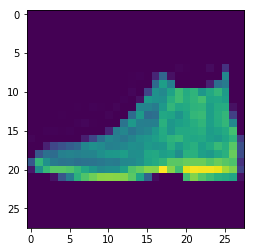

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

Kaggle example of Fashion Mnist https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist  

In [5]:
clf.cnn.searcher.history

[{'model_id': 0, 'loss': 1.1852349668741227, 'metric_value': 0.892}]

# Wishlist 
- Better handling of interruption / further training.
- Distributed computing (hyperparameter tuning on a cluster)
- More models!